<a href="https://colab.research.google.com/github/Pintopie/Liver-Tumor-ML/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import imageio
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.notebook import tqdm
from PIL import Image
from google.colab import drive

drive.mount('/content/drive')

# Define the directory
directory = "/content/drive/My Drive/Liver-tumor-project/data/liver-tumor-dataset/segmentations"

# Read files in the directory and display
files = []
for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        files.append(filename)
files.sort()

# Print all file names
for file in files:
    print(file)



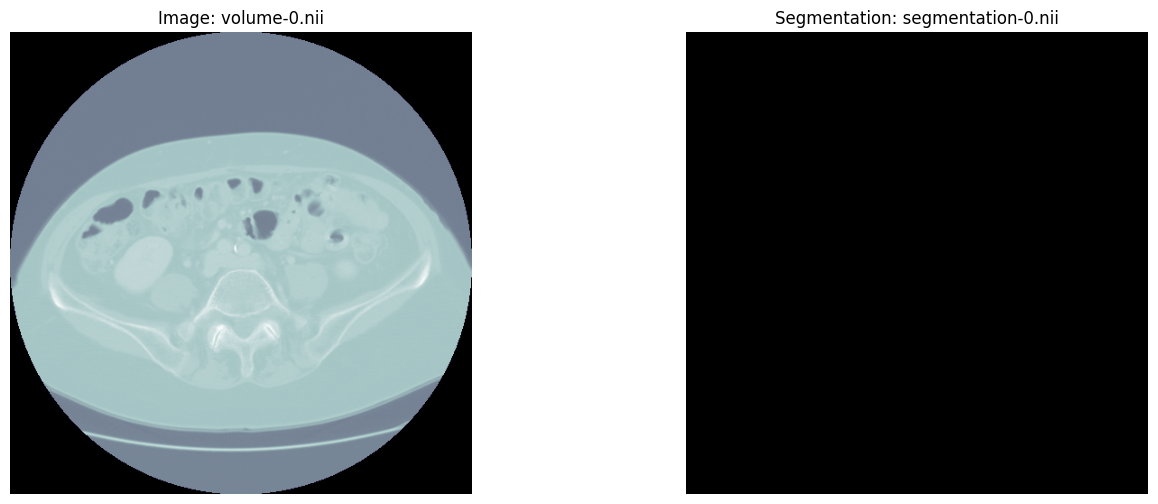

Mean Pixel Value for Image: -948.9269236246745
Mean Pixel Value for Segmentation: 0.028239847819010417



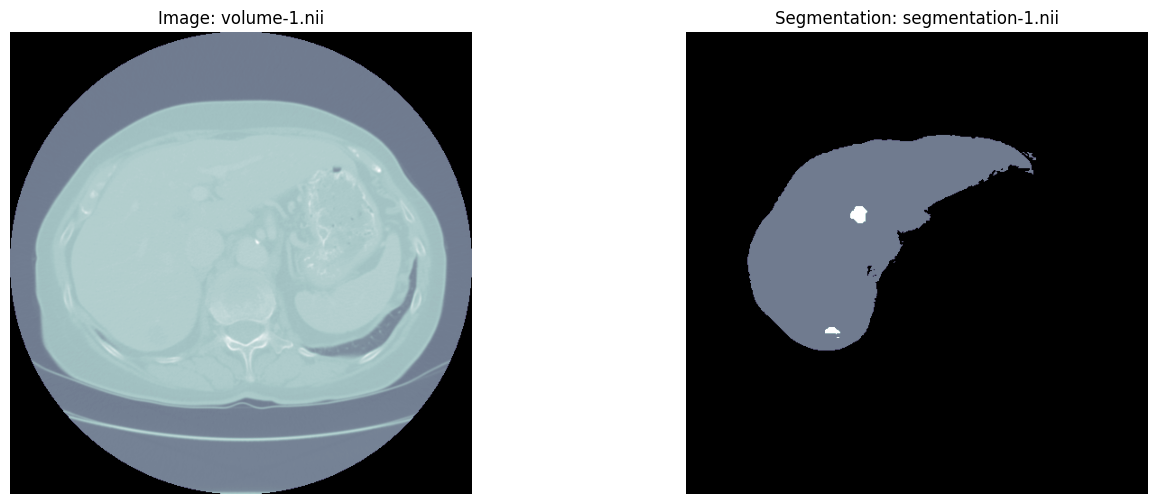

Mean Pixel Value for Image: -952.9124127519809
Mean Pixel Value for Segmentation: 0.02041225898556593



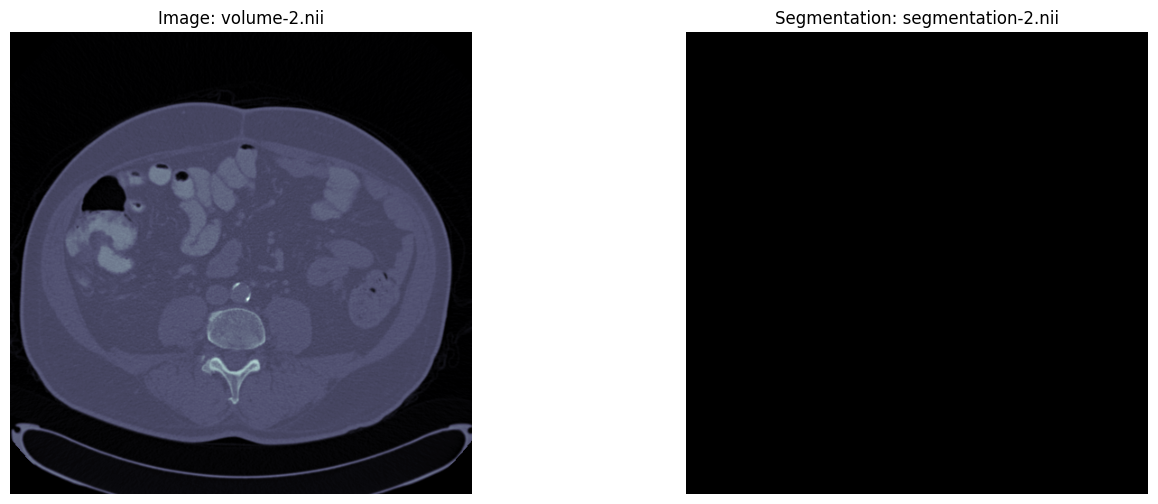

Mean Pixel Value for Image: -466.3627005158356
Mean Pixel Value for Segmentation: 0.0237217945563724



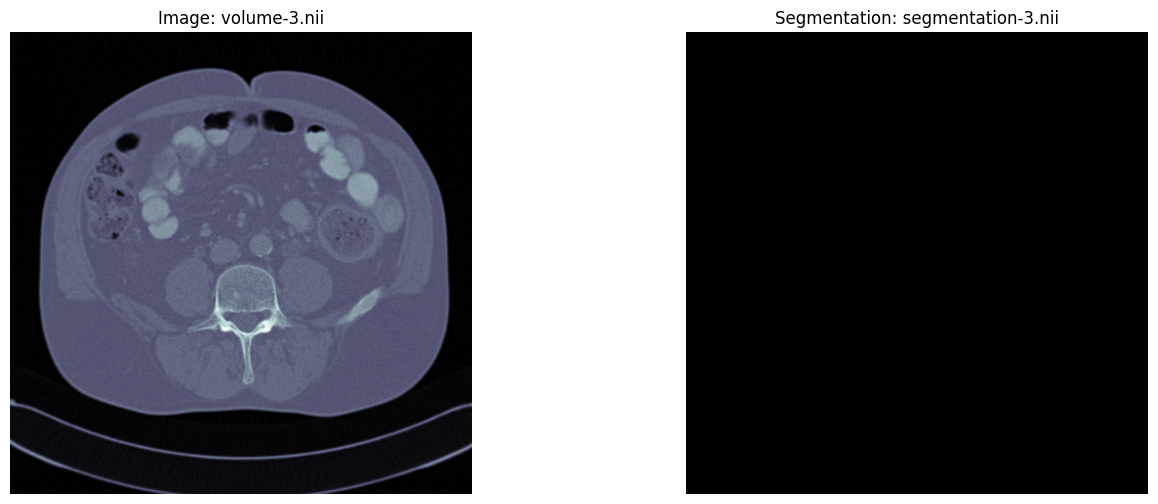

Mean Pixel Value for Image: -439.9303710951787
Mean Pixel Value for Segmentation: 0.023213447256481157



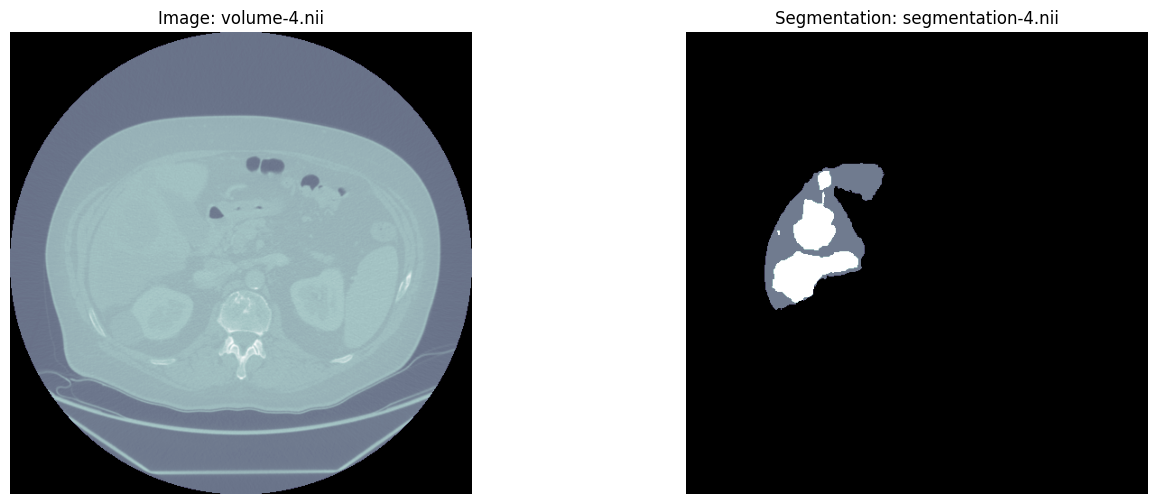

Mean Pixel Value for Image: -1007.3277145231522
Mean Pixel Value for Segmentation: 0.028773363365146125



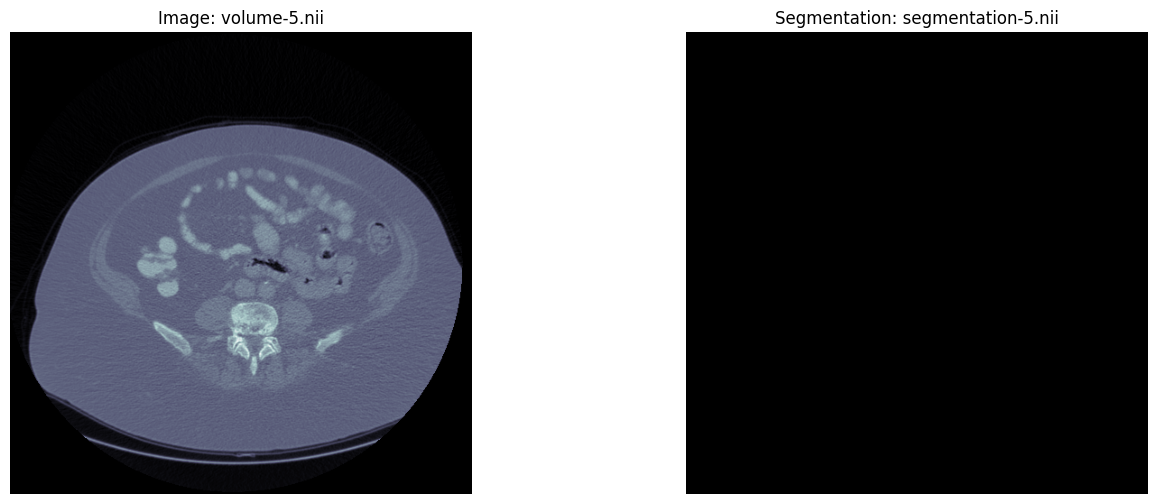

Mean Pixel Value for Image: -533.3442079412648
Mean Pixel Value for Segmentation: 0.0135900756722278



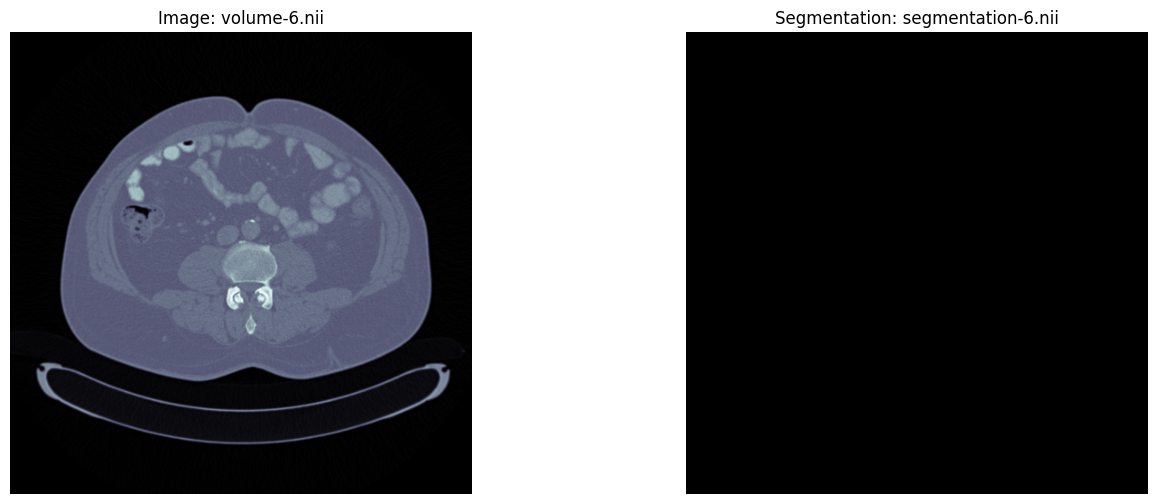

Mean Pixel Value for Image: -586.8320714884283
Mean Pixel Value for Segmentation: 0.01846002703928119



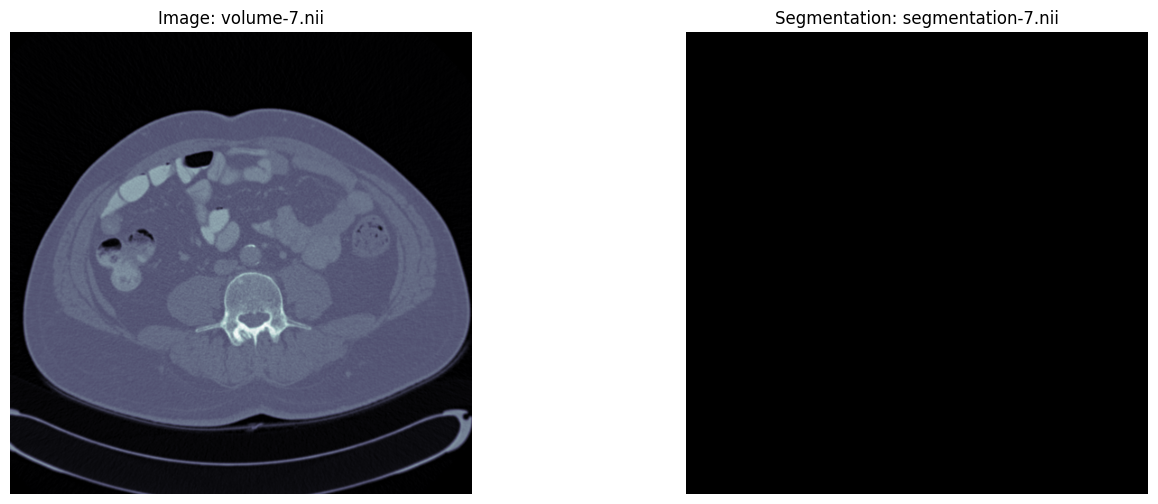

Mean Pixel Value for Image: -455.05854597109305
Mean Pixel Value for Segmentation: 0.021847539820644638



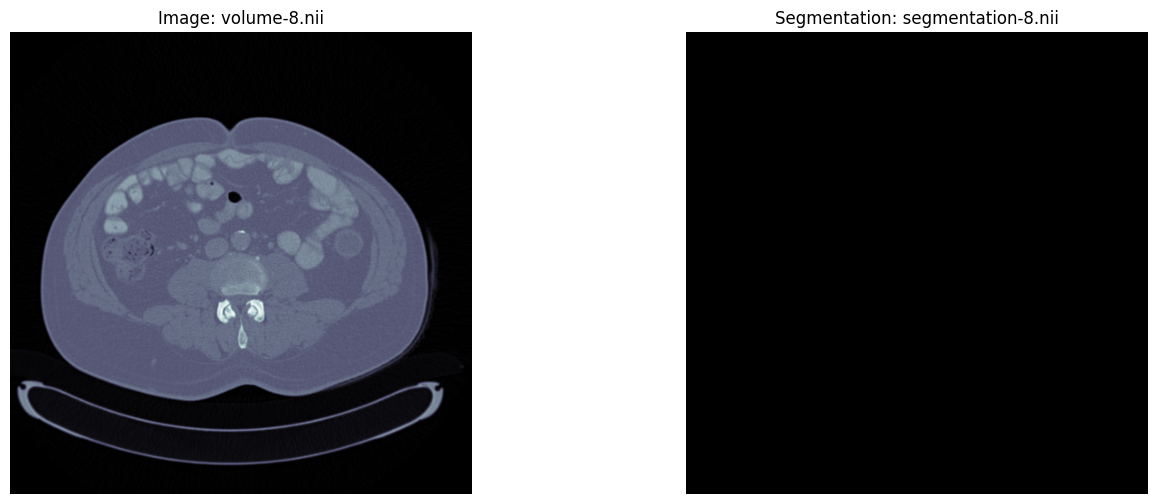

Mean Pixel Value for Image: -561.0832951134984
Mean Pixel Value for Segmentation: 0.018789774388791012



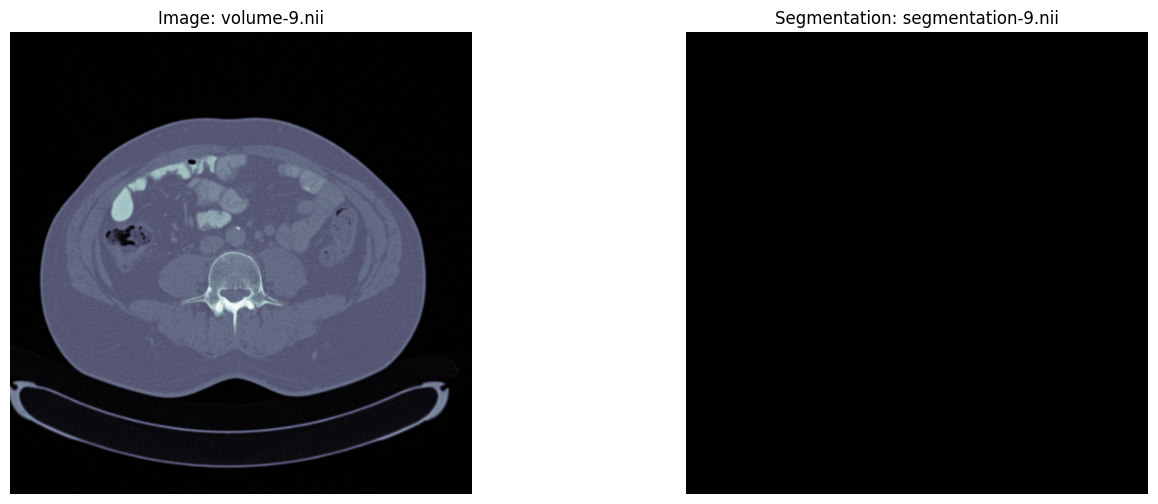

Mean Pixel Value for Image: -555.1614089437738
Mean Pixel Value for Segmentation: 0.016142978911408527



In [ ]:
def read_nii(filepath): #! long load time(~60s)

    #Reads .nii file and returns pixel array

    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return array

# Define the folders
segmentations_folder = Path("/content/drive/My Drive/Liver-tumor-project/data/liver-tumor-dataset/segmentations")
volume_folders = [
    Path("/content/drive/My Drive/Liver-tumor-project/data/liver-tumor-dataset/volume_pt1"),
    Path("/content/drive/My Drive/Liver-tumor-project/data/liver-tumor-dataset/volume_pt2"),
    Path("/content/drive/My Drive/Liver-tumor-project/data/liver-tumor-dataset/volume_pt3"),
    Path("/content/drive/My Drive/Liver-tumor-project/data/liver-tumor-dataset/volume_pt4"),
    Path("/content/drive/My Drive/Liver-tumor-project/data/liver-tumor-dataset/volume_pt5")
]
# Get a list of image and segmentation files
image_files = []
for volume_folder in volume_folders:
    image_files.extend(list(volume_folder.glob("volume-*.nii")))

segmentation_files = list(segmentations_folder.glob("segmentation-*.nii"))

# Create dictionaries where the keys are the indices of the volumes/segmentations to match correspondingly volume 0 to segment 0.nii, etc
image_dict = {int(str(file).split('-')[-1].split('.')[0]): str(file) for file in image_files}
segmentation_dict = {int(str(file).split('-')[-1].split('.')[0]): str(file) for file in segmentation_files}

# Get the intersection of the keys (i.e., the indices present in both dictionaries)
indices = list(set(image_dict.keys()).intersection(set(segmentation_dict.keys())))

# Sort the indices
indices.sort()

# Display and analyze the images and segmentations
plot_count = 0
for index in indices:
    # Only plot the first 10 images and segmentations
    if plot_count >= 10:
        break

    # Read the image and segmentation using the read_nii function
    image_array = read_nii(image_dict[index])
    segmentation_array = read_nii(segmentation_dict[index])

    # Create a subplot with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Display the image
    axes[0].imshow(image_array[..., image_array.shape[2] // 2], cmap='bone')
    axes[0].set_title(f"Image: volume-{index}.nii")
    axes[0].axis('off')

    # Display the segmentation
    axes[1].imshow(segmentation_array[..., segmentation_array.shape[2] // 2], cmap='bone')
    axes[1].set_title(f"Segmentation: segmentation-{index}.nii")
    axes[1].axis('off')

    # Show the plot
    plt.show()

    # You can add your analysis here
    # Example:
    mean_pixel_value_image = np.mean(image_array)  # Calculate the mean pixel value for the image
    mean_pixel_value_segmentation = np.mean(segmentation_array)  # Calculate the mean pixel value for the segmentation
    print(f"Mean Pixel Value for Image: {mean_pixel_value_image}")
    print(f"Mean Pixel Value for Segmentation: {mean_pixel_value_segmentation}\n")

    plot_count += 1



In [ ]:
import numpy as np
import scipy.ndimage
from skimage.feature import greycomatrix, greycoprops

def calculate_features(segmentation_array):
    # Initialize an empty dictionary to store the features
    features = {}

    # Calculate the volume of the tumor
    features['tumor_volume'] = np.sum(segmentation_array)



    # Calculate intensity features of the tumor
    tumor_pixels = segmentation_array[segmentation_array == 1]
    features['mean_intensity'] = np.mean(tumor_pixels)
    features['variance_intensity'] = np.var(tumor_pixels)
    features['skewness_intensity'] = scipy.stats.skew(tumor_pixels)
    features['kurtosis_intensity'] = scipy.stats.kurtosis(tumor_pixels)



    return features

# Iterate over all segmentations
segmentation_files = list(segmentations_folder.glob("*.nii"))
data = []
for segmentation_file in segmentation_files:
    # Read the segmentation using the read_nii function
    segmentation_array = read_nii(segmentation_file)

    # Calculate the features
    features = calculate_features(segmentation_array)

    # Append the features to the data list
    data.append(features)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Display  DataFrame 'df' with the features for each segmentation
print(df)


<ipython-input-22-608b78800928>:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features['skewness_intensity'] = scipy.stats.skew(tumor_pixels)
<ipython-input-22-608b78800928>:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features['kurtosis_intensity'] = scipy.stats.kurtosis(tumor_pixels)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import scipy.ndimage

# Initialize an empty list to store the features
data = []

# Iterate over all segmentations
for segmentation_file in segmentation_files:
    # Read the segmentation using the read_nii function
    segmentation_array = read_nii(segmentation_file)


# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Assume that you have a target variable 'y' which indicates whether a liver has a tumor (1) or not (0)
y = ...

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



IndexError: ignored

In [ ]:
# Preprocess the nii file
# Source https://docs.fast.ai/medical.imaging

dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)

@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

plt.imshow(tensor(sample_ct[...,50].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

def visualize_nii_file(nii_file_path):
    try:
        # Load the NII file
        nii_image = nib.load(nii_file_path)

        # Get the NII data as a NumPy array
        nii_data = nii_image.get_fdata()

        # Display the slices of the NII file with 6 images in a single row
        num_slices = nii_data.shape[-1]
        num_rows = (num_slices + 5) // 6  # Calculate the number of rows needed

        plt.figure(figsize=(16, 3 * num_rows))  # Adjust the figure size

        for i in range(54,55):
            plt.subplot(num_rows, 6, i + 1)
            plt.imshow(nii_data[ :,i,:], cmap='gray')
            plt.title(f"Slice {i + 1}")
            plt.axis('off')

        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
nii_file_path = "/content/drive/My Drive/Liver-tumor-project/data/liver-tumor-dataset/segmentations"
visualize_nii_file(nii_file_path)

In [ ]:
mask_sample = "/content/drive/My Drive/Liver-tumor-project/data/liver-tumor-dataset/segmentations/segmentation-3.nii"
visualize_nii_file(mask_sample)

In [ ]:
def read_nii(file):
    ct = nib.load(file)
    out = ct.get_fdata()
    out = np.rot90(np.array(out))
    return out

In [ ]:
sample = 1
sample_ct = read_nii(df.loc[sample,'dir_name']+"/"+df.loc[sample,'file_name'])
sample_mask = read_nii(df.loc[sample,'mask_dir']+"/"+df.loc[sample,'mask_file'])

print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')

In [ ]:
# from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)
@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l-w//2
    px_max = l+w//2
    px[px<px_min]=px_min
    px[px>px_max]=px_max
    return (px-px_min)/(px_max-px_min)
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(tensor(sample_ct[..., 55].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [ ]:
def plot_sample(arr_list, color_map = 'nipy_spectral'):
    fig = plt.figure(figsize=(20,16), dpi=100)
    plt.subplot(1,4,1)
    plt.imshow(arr_list[0],cmap="bone")
    plt.title("original_image")
    plt.axis("off")

    plt.subplot(1,4,2)
    plt.imshow(tensor(arr_list[0].astype(np.float32)).windowed(*dicom_windows.liver),cmap='bone');
    plt.title("windowed_image")
    plt.axis("off")

    plt.subplot(1,4,3)
    plt.imshow(arr_list[1],alpha=0.5, cmap=color_map)
    plt.title("mask")
    plt.axis("off")

    plt.subplot(1,4,4)
    plt.imshow(arr_list[0],cmap="bone")
    plt.imshow(arr_list[1],alpha=0.5, cmap=color_map)
    plt.title("Liver_with_mask")
    plt.axis("off")


    plt.show()

In [ ]:
sample=55
sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

# Load the NIfTI mask file
mask_img = nib.load("/content/drive/My Drive/Liver-tumor-project/data/liver-tumor-dataset/segmentations/segmentation-118.nii")
mask_data = mask_img.get_fdata()

# Get a slice of the mask, e.g. the middle slice
slice_num = mask_data.shape[2] // 2
slice_data = mask_data[:, :, slice_num]

# Plot the slice using pcolormesh
plt.figure()
plt.pcolormesh(slice_data)
plt.gca().set_aspect('equal')
plt.colorbar()
plt.title('Mask Slice')
plt.show()

In [ ]:
import nibabel as nib
img = nib.load("/content/drive/My Drive/Liver-tumor-project/data/liver-tumor-dataset/segmentations/segmentation-118.nii")
img

In [ ]:
print(img.header)

In [ ]:
img.shape

In [ ]:
data = img.get_fdata()
data.dtype

In [ ]:
import numpy as np
data_mean= np.mean(data)
data_std = np.std(data)
print(f"mean : {data_mean},   std : {data_std}")

In [ ]:
import matplotlib.pyplot as plt
middle_slice = data[:,:,img.shape[-1]//2 -1]
plt.imshow(middle_slice)

In [ ]:
plt.hist(np.ravel(data), bins=100);

In [ ]:
is_above_0 = data >-1024.2
is_below_1000 = data < 500
# Combine the two selections with & (True if both are True).
is_both = is_above_0 & is_below_1000
plt.hist(data[is_both], bins=100);

In [ ]:
plt.imshow(middle_slice.T)

In [ ]:
yz_slice = data[img.shape[0]//2-1, :,:]
yz_slice.shape

In [ ]:
plt.imshow(yz_slice.T)

In [ ]:
xz_slice = data[:,img.shape[0]//2-1,:]
xz_slice.shape

In [ ]:
plt.imshow(xz_slice.T)

In [ ]:
img.orthoview()